In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
X = pd.read_csv('data/bloomberg20240504.csv')
X.DATE = pd.to_datetime(X.DATE)
X.sort_values(by=['ID', 'DATE'], ascending=True, inplace=True)

## Feature Engineering

- simple moving average
- exponentially weighted moving average
- logarthmic returns
- relative strength index

In [32]:
def create_sma(X:pd.DataFrame, N:int, variable:str, period:str='D') -> pd.DataFrame:
    X[f'{variable}_SMA_{N}{period}'] = X.groupby('ID')[f'{variable}'].transform(lambda x: x.rolling(window=N).mean().shift())
    return X

def ewma(X:pd.DataFrame, N:int, variable:str, period:str='D') -> pd.DataFrame:
    X[f'{variable}_EWMA_{N}{period}'] = X.groupby('ID')[f'{variable}'].transform(lambda x: x.ewm(span=N).mean().shift())
    return X

periods,freqs = [3,9,21,50,65,120,360], ['D']*7

for p, f in zip(periods,freqs):
    
    X = create_sma(X,p,'CLOSE',f)
    X = ewma(X,p,'CLOSE',f)

    X = create_sma(X,p,'VOLATILITY_90D',f)
    X = ewma(X,p,'VOLATILITY_90D',f)

X

,Unnamed: 0,DATE,ID,CLOSE,VOLUME,HIGH,VOLATILITY_90D,CLOSE_SMA_3D,CLOSE_EWMA_3D,VOLATILITY_90D_SMA_3D,...,VOLATILITY_90D_SMA_65D,VOLATILITY_90D_EWMA_65D,CLOSE_SMA_120D,CLOSE_EWMA_120D,VOLATILITY_90D_SMA_120D,VOLATILITY_90D_EWMA_120D,CLOSE_SMA_360D,CLOSE_EWMA_360D,VOLATILITY_90D_SMA_360D,VOLATILITY_90D_EWMA_360D
55023,51614,2010-08-31,AAPL,8.682,420786408,8.734,116.917,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55010,51599,2010-09-01,AAPL,8.940,697035220,8.981,116.117,NaN,8.682000,NaN,...,NaN,116.917000,NaN,8.682000,NaN,116.917000,NaN,8.682000,NaN,116.917000
54993,51584,2010-09-02,AAPL,9.006,415425192,9.006,115.003,NaN,8.854000,NaN,...,NaN,116.510846,NaN,8.812075,NaN,116.513667,NaN,8.811358,NaN,116.515889
54978,51569,2010-09-03,AAPL,9.242,520788268,9.242,113.779,8.876000,8.940857,116.012333,...,NaN,115.992688,NaN,8.877797,NaN,116.001695,NaN,8.876600,NaN,116.008788
54972,51554,2010-09-07,AAPL,9.208,342825252,9.269,112.786,9.062667,9.101467,114.966333,...,NaN,115.413465,NaN,8.971137,NaN,115.432053,NaN,8.968712,NaN,115.446687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,74,2024-04-29,XOM,119.640,17343755,120.050,17.892,120.113333,119.504947,17.402333,...,19.824754,19.596835,106.467750,109.981080,21.692525,21.051606,108.549472,104.919809,25.848339,25.311707
57,59,2024-04-30,XOM,118.270,21083294,120.200,17.751,119.643333,119.572474,17.632667,...,19.746323,19.545174,106.566583,110.140732,21.629375,20.999381,108.570472,105.001362,25.803506,25.270601
47,44,2024-05-01,XOM,116.030,27789759,118.470,18.099,118.623333,118.921237,17.838000,...,19.664754,19.490805,106.669917,110.275100,21.563642,20.945689,108.590750,105.074872,25.758358,25.228941
28,29,2024-05-02,XOM,116.240,25513648,117.260,18.099,117.980000,117.475618,17.914000,...,19.588877,19.448629,106.768417,110.370222,21.499675,20.898636,108.595889,105.135565,25.713969,25.189440


In [33]:
X.drop(columns=['Unnamed: 0'], inplace=True)

In [34]:
X

,DATE,ID,CLOSE,VOLUME,HIGH,VOLATILITY_90D,CLOSE_SMA_3D,CLOSE_EWMA_3D,VOLATILITY_90D_SMA_3D,VOLATILITY_90D_EWMA_3D,...,VOLATILITY_90D_SMA_65D,VOLATILITY_90D_EWMA_65D,CLOSE_SMA_120D,CLOSE_EWMA_120D,VOLATILITY_90D_SMA_120D,VOLATILITY_90D_EWMA_120D,CLOSE_SMA_360D,CLOSE_EWMA_360D,VOLATILITY_90D_SMA_360D,VOLATILITY_90D_EWMA_360D
55023,2010-08-31,AAPL,8.682,420786408,8.734,116.917,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55010,2010-09-01,AAPL,8.940,697035220,8.981,116.117,NaN,8.682000,NaN,116.917000,...,NaN,116.917000,NaN,8.682000,NaN,116.917000,NaN,8.682000,NaN,116.917000
54993,2010-09-02,AAPL,9.006,415425192,9.006,115.003,NaN,8.854000,NaN,116.383667,...,NaN,116.510846,NaN,8.812075,NaN,116.513667,NaN,8.811358,NaN,116.515889
54978,2010-09-03,AAPL,9.242,520788268,9.242,113.779,8.876000,8.940857,116.012333,115.594714,...,NaN,115.992688,NaN,8.877797,NaN,116.001695,NaN,8.876600,NaN,116.008788
54972,2010-09-07,AAPL,9.208,342825252,9.269,112.786,9.062667,9.101467,114.966333,114.626333,...,NaN,115.413465,NaN,8.971137,NaN,115.432053,NaN,8.968712,NaN,115.446687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2024-04-29,XOM,119.640,17343755,120.050,17.892,120.113333,119.504947,17.402333,17.592493,...,19.824754,19.596835,106.467750,109.981080,21.692525,21.051606,108.549472,104.919809,25.848339,25.311707
57,2024-04-30,XOM,118.270,21083294,120.200,17.751,119.643333,119.572474,17.632667,17.742247,...,19.746323,19.545174,106.566583,110.140732,21.629375,20.999381,108.570472,105.001362,25.803506,25.270601
47,2024-05-01,XOM,116.030,27789759,118.470,18.099,118.623333,118.921237,17.838000,17.746623,...,19.664754,19.490805,106.669917,110.275100,21.563642,20.945689,108.590750,105.074872,25.758358,25.228941
28,2024-05-02,XOM,116.240,25513648,117.260,18.099,117.980000,117.475618,17.914000,17.922812,...,19.588877,19.448629,106.768417,110.370222,21.499675,20.898636,108.595889,105.135565,25.713969,25.189440


In [35]:
X.sort_values(by='DATE',ascending=True,inplace=True)

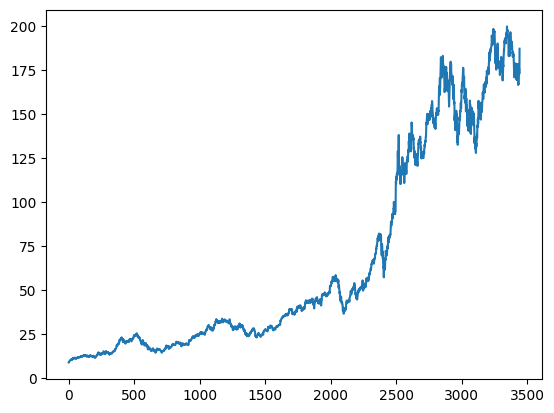

In [36]:
plt.plot(range(len(X.loc[X.ID=="AAPL"].HIGH)),X.loc[X.ID=="AAPL"].HIGH.values)

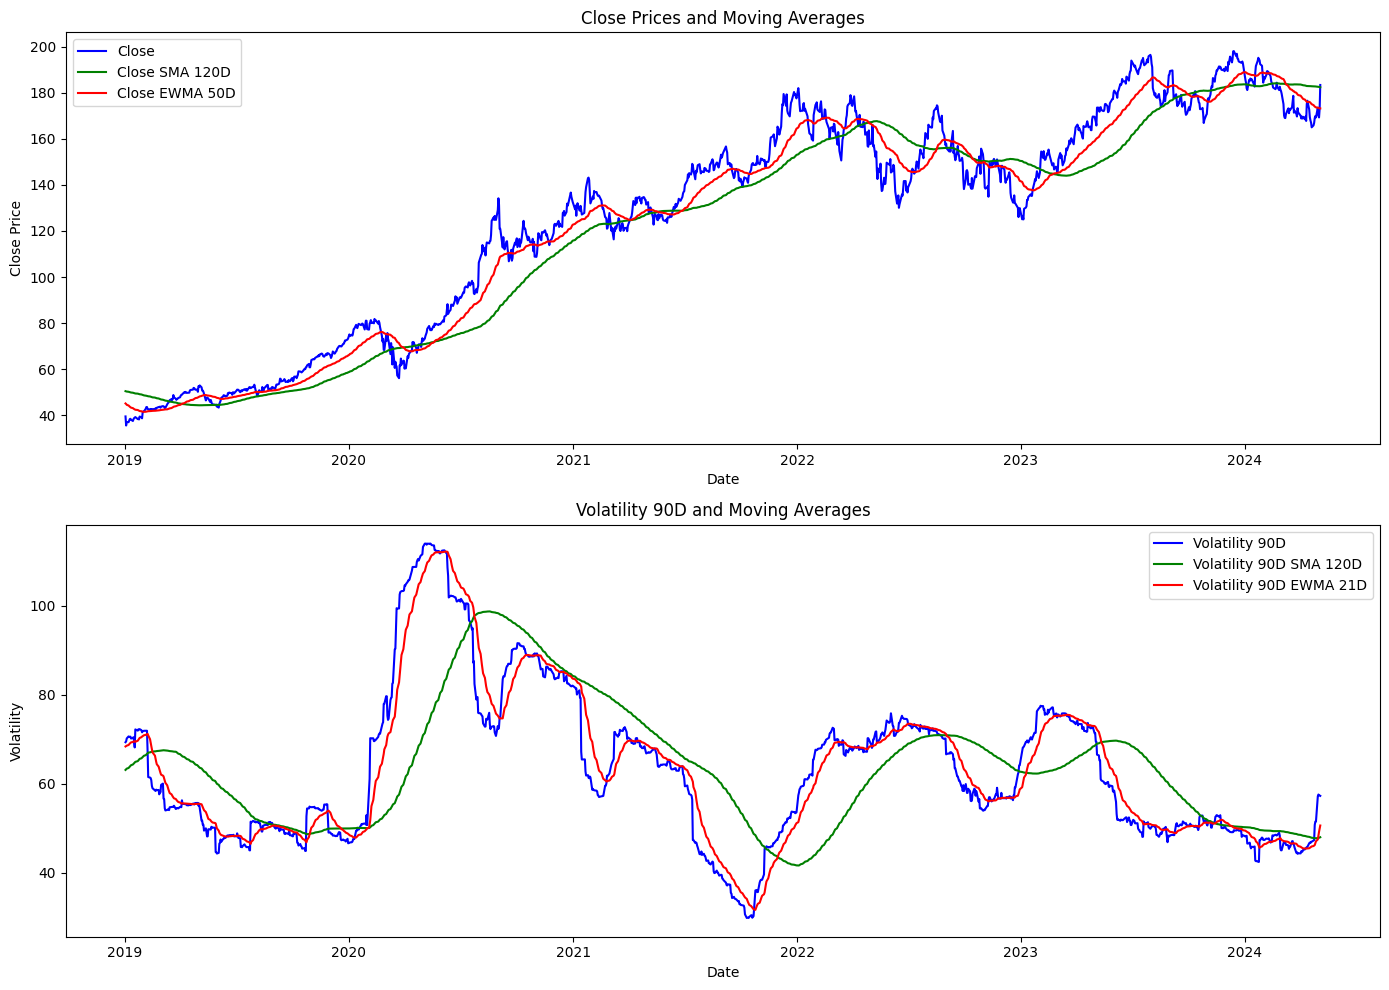

In [10]:
# Plotting
fig, ax = plt.subplots(2, 1, figsize=(14, 10))  # Creates 2 subplots

X = X.loc[X.ID=='AAPL'].loc[X.DATE > '2019-01-01']

# Subplot 1: Close prices and their moving averages
ax[0].plot(X['DATE'], X['CLOSE'], label='Close', color='blue')
ax[0].plot(X['DATE'], X['CLOSE_SMA_120D'], label='Close SMA 120D', color='green')
ax[0].plot(X['DATE'], X['CLOSE_EWMA_50D'], label='Close EWMA 50D', color='red')
ax[0].set_title('Close Prices and Moving Averages')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Close Price')
ax[0].legend()

# Subplot 2: Volatility and its moving averages
ax[1].plot(X['DATE'], X['VOLATILITY_90D'], label='Volatility 90D', color='blue')
ax[1].plot(X['DATE'], X['VOLATILITY_90D_SMA_120D'], label='Volatility 90D SMA 120D', color='green')
ax[1].plot(X['DATE'], X['VOLATILITY_90D_EWMA_21D'], label='Volatility 90D EWMA 21D', color='red')
ax[1].set_title('Volatility 90D and Moving Averages')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Volatility')
ax[1].legend()

# Show the plots
plt.tight_layout()  # Adjusts subplot params so that subplots fit into the figure area.
plt.show()


In [37]:
X['RETURNS'] = X.groupby('ID')['CLOSE'].transform(lambda x: np.log(x / x.shift(1)))

In [38]:
def roc(X:pd.DataFrame, column:str, periods:int=14) -> pd.DataFrame:
    X[f'{column}_ROC_{periods}D'] = X.groupby('ID')[column].transform(lambda x: x.diff(periods) / x.shift(periods) * 100)
    return X

periods = [3,9,21,50,65,120,360]

for p in periods:
    X = roc(X,'CLOSE',p)
    X = roc(X,'HIGH',p)
    X = roc(X,'VOLATILITY_90D',p)


In [25]:
X.ID.unique()

array(['AMT', 'XOM', 'T', 'SO', 'PFE', 'NVDA', 'NFLX', 'JPM', 'JNJ',
       'GLD', 'MARK', 'GE', 'COST', 'AMZN', 'TSLA', 'AAPL'], dtype=object)

In [39]:
X.columns.to_list()

['DATE',
 'ID',
 'CLOSE',
 'VOLUME',
 'HIGH',
 'VOLATILITY_90D',
 'CLOSE_SMA_3D',
 'CLOSE_EWMA_3D',
 'VOLATILITY_90D_SMA_3D',
 'VOLATILITY_90D_EWMA_3D',
 'CLOSE_SMA_9D',
 'CLOSE_EWMA_9D',
 'VOLATILITY_90D_SMA_9D',
 'VOLATILITY_90D_EWMA_9D',
 'CLOSE_SMA_21D',
 'CLOSE_EWMA_21D',
 'VOLATILITY_90D_SMA_21D',
 'VOLATILITY_90D_EWMA_21D',
 'CLOSE_SMA_50D',
 'CLOSE_EWMA_50D',
 'VOLATILITY_90D_SMA_50D',
 'VOLATILITY_90D_EWMA_50D',
 'CLOSE_SMA_65D',
 'CLOSE_EWMA_65D',
 'VOLATILITY_90D_SMA_65D',
 'VOLATILITY_90D_EWMA_65D',
 'CLOSE_SMA_120D',
 'CLOSE_EWMA_120D',
 'VOLATILITY_90D_SMA_120D',
 'VOLATILITY_90D_EWMA_120D',
 'CLOSE_SMA_360D',
 'CLOSE_EWMA_360D',
 'VOLATILITY_90D_SMA_360D',
 'VOLATILITY_90D_EWMA_360D',
 'RETURNS',
 'CLOSE_ROC_3D',
 'HIGH_ROC_3D',
 'VOLATILITY_90D_ROC_3D',
 'CLOSE_ROC_9D',
 'HIGH_ROC_9D',
 'VOLATILITY_90D_ROC_9D',
 'CLOSE_ROC_21D',
 'HIGH_ROC_21D',
 'VOLATILITY_90D_ROC_21D',
 'CLOSE_ROC_50D',
 'HIGH_ROC_50D',
 'VOLATILITY_90D_ROC_50D',
 'CLOSE_ROC_65D',
 'HIGH_ROC_65D',
 '

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55960 entries, 55951 to 7
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATE                      55960 non-null  datetime64[ns]
 1   ID                        55960 non-null  object        
 2   CLOSE                     55960 non-null  float64       
 3   VOLUME                    55960 non-null  int64         
 4   HIGH                      55960 non-null  float64       
 5   VOLATILITY_90D            52455 non-null  float64       
 6   CLOSE_SMA_3D              55912 non-null  float64       
 7   CLOSE_EWMA_3D             55944 non-null  float64       
 8   VOLATILITY_90D_SMA_3D     52410 non-null  float64       
 9   VOLATILITY_90D_EWMA_3D    52440 non-null  float64       
 10  CLOSE_SMA_9D              55816 non-null  float64       
 11  CLOSE_EWMA_9D             55944 non-null  float64       
 12  VOLATILITY_90D_SMA_9D  

In [41]:
X.to_csv('data.csv')

In [1]:
import pandas as pd
X = pd.read_csv('assets/data.csv')
L = X.loc[X.DATE > '2024-01-01'].to_csv('example.csv')

In [43]:
X

,DATE,ID,CLOSE,VOLUME,HIGH,VOLATILITY_90D,CLOSE_SMA_3D,CLOSE_EWMA_3D,VOLATILITY_90D_SMA_3D,VOLATILITY_90D_EWMA_3D,...,VOLATILITY_90D_ROC_50D,CLOSE_ROC_65D,HIGH_ROC_65D,VOLATILITY_90D_ROC_65D,CLOSE_ROC_120D,HIGH_ROC_120D,VOLATILITY_90D_ROC_120D,CLOSE_ROC_360D,HIGH_ROC_360D,VOLATILITY_90D_ROC_360D
55951,2010-06-02,AMT,41.4500,4244815,41.5100,25.906,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55948,2010-06-02,XOM,60.7700,28670754,60.8000,18.993,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55950,2010-06-02,T,18.7033,25630019,18.7109,16.278,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55959,2010-06-02,SO,32.6900,5779084,32.7100,15.025,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55958,2010-06-02,PFE,14.4088,49548599,14.4278,21.018,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2024-05-03,TSLA,181.1900,75491539,184.7800,23.881,181.093333,180.362305,21.378000,21.393771,...,33.585053,-3.256981,-4.737846,29.611940,-13.710830,-16.313406,13.811180,-0.913267,-0.226782,-36.819408
10,2024-05-03,COST,743.9000,2323300,747.4900,20.103,725.853333,727.865282,19.915667,20.028470,...,8.208634,7.054455,5.948804,4.654068,32.068102,31.369069,32.807029,39.395870,39.493524,-28.139410
9,2024-05-03,GE,164.1100,3968626,165.3000,29.044,161.386667,161.813781,29.033000,29.036035,...,30.405891,55.393806,54.134497,25.449205,81.954657,80.599288,13.982968,199.178176,200.529062,-10.598085
3,2024-05-03,MARK,0.1237,170130,0.1296,17.503,0.127767,0.125563,17.501000,17.488900,...,0.246277,-80.821705,-84.671792,7.373781,-78.449477,-78.620917,-4.261022,-95.264165,-95.194661,-14.175738


In [161]:
M = X.loc[X.ID=='NFLX'].loc[X.DATE > '2020-03-01'].loc[X.DATE<'2020-07-16']
M

,DATE,ID,CLOSE,VOLUME,HIGH,VOLATILITY_90D,CLOSE_SMA_3D,CLOSE_EWMA_3D,VOLATILITY_90D_SMA_3D,VOLATILITY_90D_EWMA_3D,...,VOLATILITY_90D_ROC_50D,CLOSE_ROC_65D,HIGH_ROC_65D,VOLATILITY_90D_ROC_65D,CLOSE_ROC_120D,HIGH_ROC_120D,VOLATILITY_90D_ROC_120D,CLOSE_ROC_360D,HIGH_ROC_360D,VOLATILITY_90D_ROC_360D
16824,2020-03-02,NFLX,381.05,6997891,381.36,30.933,373.326667,370.836274,32.093667,31.807814,...,-4.677822,20.757408,20.786748,-8.352098,29.459129,26.466589,-10.819927,3.095154,2.066160,-18.633769
16804,2020-03-03,NFLX,368.77,8364623,393.52,31.479,373.930000,375.943137,31.314667,31.370407,...,-3.337837,18.010176,24.334913,-6.709540,28.049585,32.422519,-9.248422,-0.178654,5.972963,-17.182320
16795,2020-03-04,NFLX,383.79,5487340,384.01,32.087,372.950000,372.356569,31.311000,31.424704,...,-0.425149,21.479442,21.207626,-3.602115,33.135602,31.218179,-7.305870,1.563989,0.526178,-15.558304
16777,2020-03-05,NFLX,372.78,8746985,391.40,32.463,377.870000,378.073284,31.499667,31.755852,...,0.738557,18.470730,23.618217,-1.552691,29.052136,33.706829,-5.830650,-2.082950,2.139875,-14.595775
16761,2020-03-06,NFLX,368.97,8147165,371.31,32.445,375.113333,375.426642,32.009667,32.109426,...,1.166163,19.026420,18.104902,-0.761608,25.436002,25.180365,-6.155092,-1.379200,-2.492122,-13.703221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15382,2020-07-09,NFLX,507.76,5840541,510.00,54.198,496.583333,495.532889,54.652333,54.614633,...,-1.163469,33.635119,34.108181,3.815653,49.949796,48.447847,68.846382,44.520977,44.886364,-7.448770
15366,2020-07-10,NFLX,548.73,21605587,555.88,55.315,501.233333,501.646445,54.478333,54.406316,...,1.250183,47.397120,45.774002,5.712265,61.547973,62.742630,72.320872,54.219949,54.411111,-5.392693
15348,2020-07-13,NFLX,525.50,18399020,575.37,55.618,519.756667,525.188222,54.684667,54.860658,...,1.732180,41.598405,52.057401,6.297422,55.422791,68.730205,73.162303,49.209234,61.150011,-4.884222
15341,2020-07-14,NFLX,524.88,15083300,525.50,55.571,527.330000,525.344111,55.043667,55.239329,...,1.649930,41.583945,41.225477,6.366159,61.006135,56.259292,70.212570,52.267123,50.681004,-5.024696


In [162]:
M['signal'] = np.where(M['CLOSE_SMA_9D'] > M['CLOSE_SMA_21D'], 1, 0)
M['signal'] = np.where(M['CLOSE_SMA_9D'] < M['CLOSE_SMA_21D'], -1, M['signal'])
M.signal.value_counts()

signal
 1    62
-1    33
Name: count, dtype: int64

In [163]:
M['system_returns'] = M['RETURNS'] * M['signal']
M['entry'] = M.signal.diff()
M.entry.value_counts()

entry
 0.0    90
-2.0     2
 2.0     2
Name: count, dtype: int64

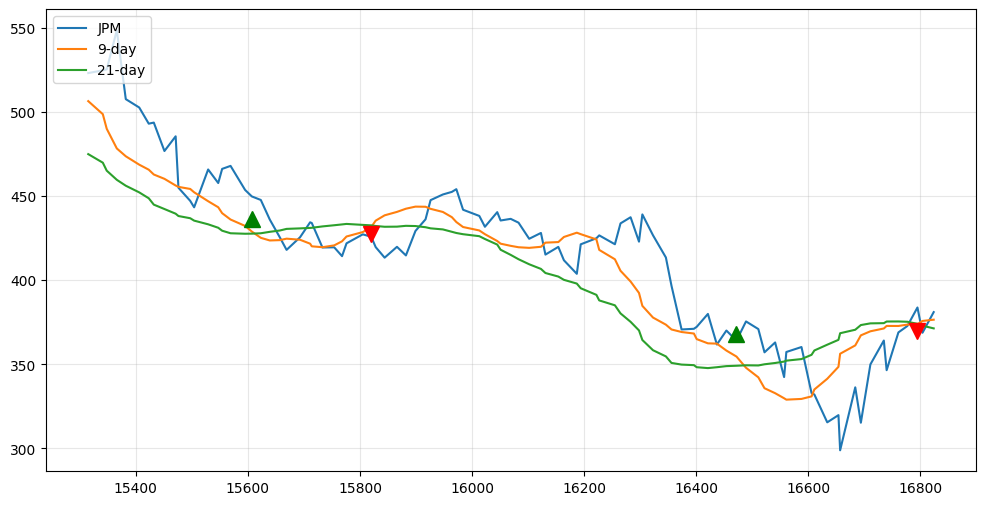

In [164]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(M.CLOSE, label = 'JPM')
plt.plot(M.CLOSE_SMA_9D, label = '9-day')
plt.plot(M.CLOSE_SMA_21D, label = '21-day')
plt.plot(M.loc[M.entry == 2].index, M.CLOSE_SMA_3D[M.entry == 2], '^',
         color = 'g', markersize = 12)
plt.plot(M.loc[M.entry == -2].index, M.CLOSE_EWMA_21D[M.entry == -2], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

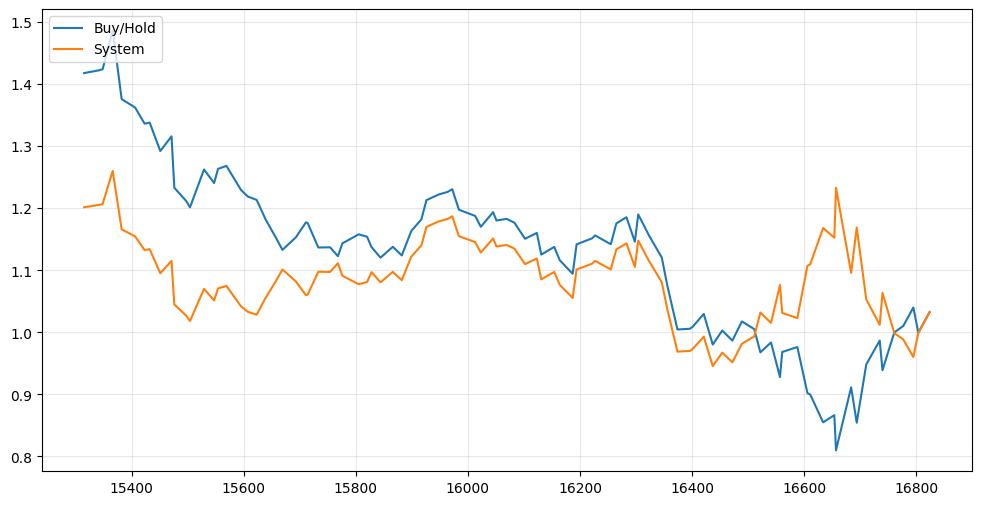

In [165]:
plt.plot(np.exp(M['RETURNS']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(M['system_returns']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=.3)

In [166]:
list(np.exp(M['RETURNS']).cumprod())[-1]-1

0.41793350134135454

In [167]:
list(np.exp(M['system_returns']).cumprod())[-1] -1

0.20164776791174233

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

def calculate_and_plot_strategy(df: pd.DataFrame, stock_id: str, start_date: str, end_date: str) -> pd.DataFrame:
    # Filter data based on stock ID and date range
    filtered_data = df.loc[(df.ID == stock_id) & (df.DATE > start_date) & (df.DATE < end_date)]

    # Calculate signals based on SMA crossing
    filtered_data['signal'] = np.where(filtered_data['CLOSE_SMA_9D'] > filtered_data['CLOSE_SMA_21D'], 1, 0)
    filtered_data['signal'] = np.where(filtered_data['CLOSE_SMA_9D'] < filtered_data['CLOSE_SMA_21D'], -1, filtered_data['signal'])

    # Calculate system returns
    filtered_data['system_returns'] = filtered_data['RETURNS'] * filtered_data['signal']
    filtered_data['entry'] = filtered_data.signal.diff()

    # Setup plotting parameters
    plt.rcParams['figure.figsize'] = (12, 6)
    plt.grid(True, alpha=.3)

    # Plot close prices and SMAs
    plt.plot(filtered_data.CLOSE, label=f'{stock_id} Close')
    plt.plot(filtered_data.CLOSE_SMA_9D, label='9-day SMA')
    plt.plot(filtered_data.CLOSE_SMA_21D, label='21-day SMA')

    # Plot entry points for long and short positions
    plt.plot(filtered_data.loc[filtered_data.entry == 2].index, filtered_data.CLOSE_SMA_3D[filtered_data.entry == 2], '^',
             color='g', markersize=12, label='Long Entry')
    plt.plot(filtered_data.loc[filtered_data.entry == -2].index, filtered_data.CLOSE_EWMA_21D[filtered_data.entry == -2], 'v',
             color='r', markersize=12, label='Short Entry')

    plt.legend(loc='upper left')
    plt.title(f'Trading Signals for {stock_id}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

    # Plot cumulative returns for Buy and Hold vs. Strategy
    plt.figure()
    plt.plot(np.exp(filtered_data['RETURNS']).cumprod(), label='Buy/Hold Cumulative Returns')
    plt.plot(np.exp(filtered_data['system_returns']).cumprod(), label='Strategy Cumulative Returns')
    plt.legend(loc='upper left')
    plt.title('Market vs. Strategy Cumulative Returns')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.grid(True, alpha=.3)
    plt.show()

    # Display final returns
    market_returns = np.exp(filtered_data['RETURNS']).cumprod().iloc[-1] - 1
    strategy_returns = np.exp(filtered_data['system_returns']).cumprod().iloc[-1] - 1
    print(f'Market Returns: {market_returns*100:.2f}%')
    print(f'Strategy Returns: {strategy_returns*100:.2f}%')

    return filtered_data


/var/folders/zj/h0kz7p216vg8wfpn043t_y5w0000gn/T/ipykernel_81660/3583044563.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['signal'] = np.where(filtered_data['CLOSE_SMA_9D'] > filtered_data['CLOSE_SMA_21D'], 1, 0)
/var/folders/zj/h0kz7p216vg8wfpn043t_y5w0000gn/T/ipykernel_81660/3583044563.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['signal'] = np.where(filtered_data['CLOSE_SMA_9D'] < filtered_data['CLOSE_SMA_21D'], -1, filtered_data['signal'])
/var/folders/zj/h0kz7

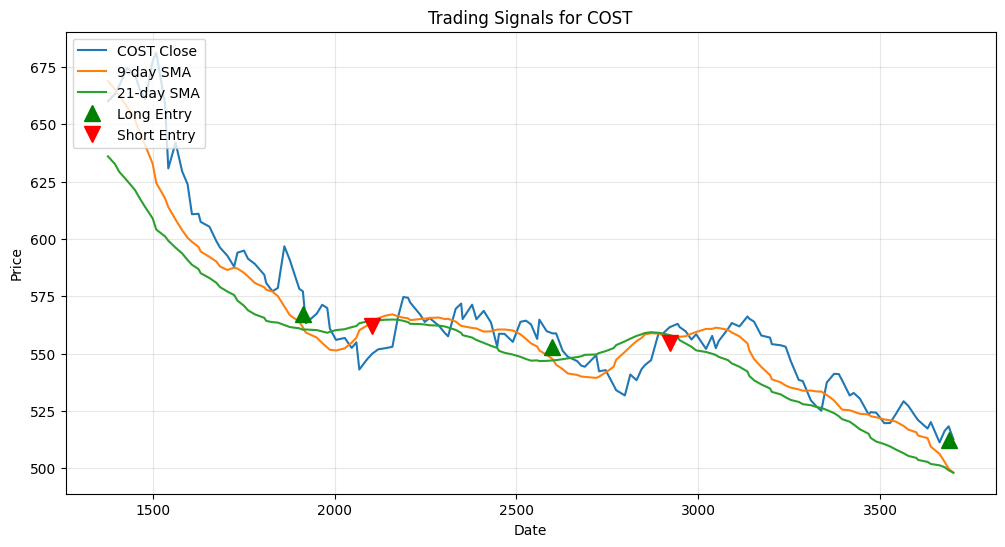

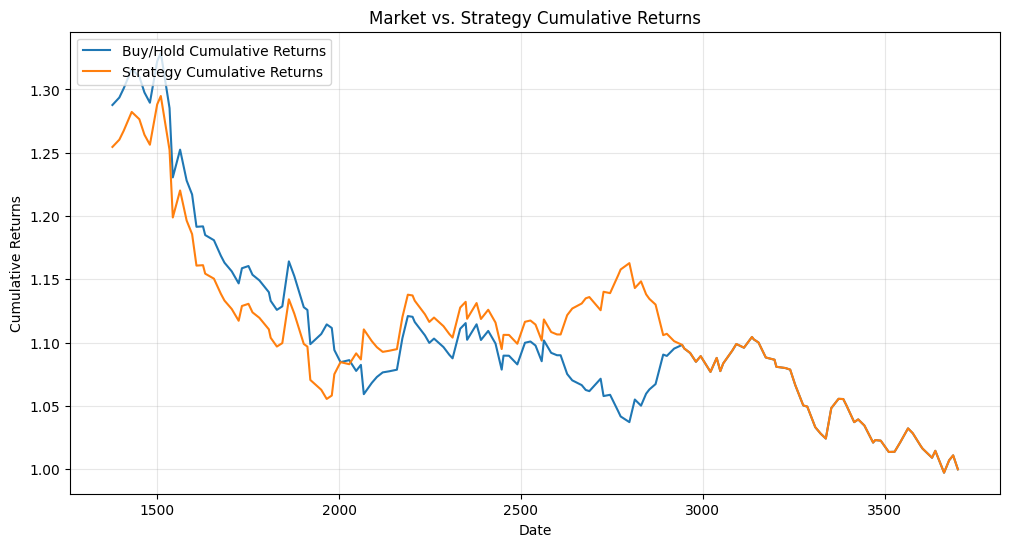

Market Returns: 28.77%
Strategy Returns: 25.46%


In [170]:
M = calculate_and_plot_strategy(X,'COST','2023-06-01','2024-01-01')